In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv("CustomerChurn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replace blanks with 0 as tenure is 0 and number of total charge is recorded.

In [9]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.isnull().sum().sum()

np.int64(0)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df["customerID"].duplicated().sum()

np.int64(0)

#To Convert SeniorCitizen value from 0 and 1 to NO and Yes respectively.

In [16]:
def conv(value):
    if value==1:
        return 'Yes'
    else:
        return 'No'

In [17]:
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


#CHURN_Analysis

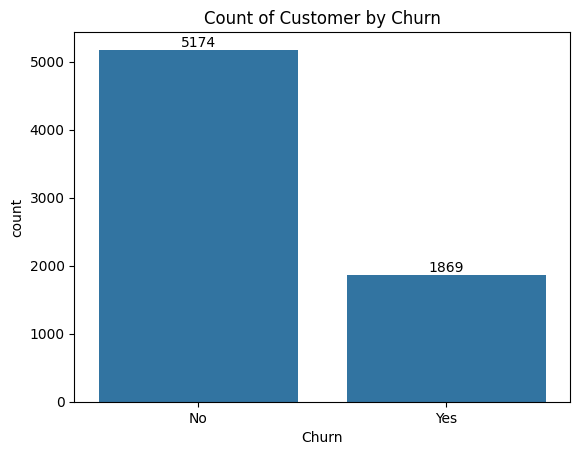

In [20]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

In [21]:
gb=df.groupby("Churn").agg({"Churn":"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


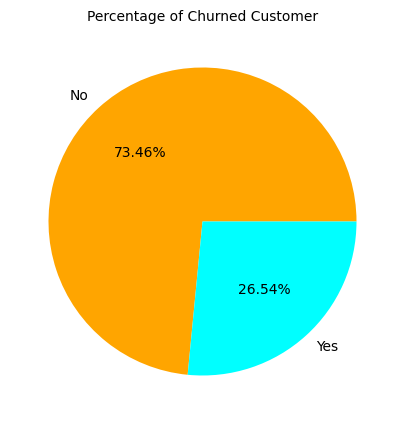

In [22]:
plt.figure(figsize=(5,5))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,colors=["#FFA500","#00FFFF"],autopct="%1.2f%%")
plt.title("Percentage of Churned Customer",fontsize=10)
plt.show()

#From above Pie-Chart wee can conclude that 26.54% of our Customer have Churned out.
#Now let's explore the reason behide it.

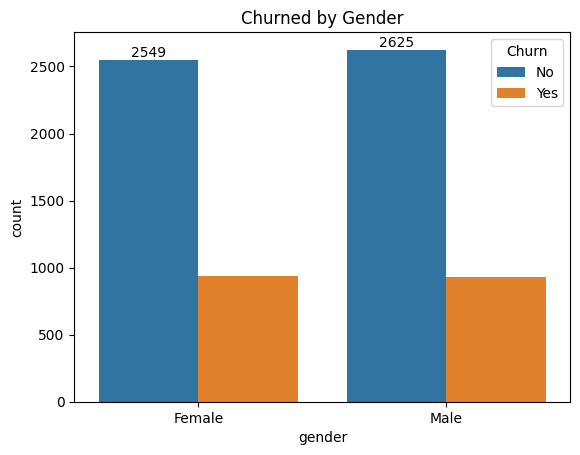

<Figure size 600x400 with 0 Axes>

In [23]:
bx=sns.countplot(x="gender",data=df,hue="Churn")
bx.bar_label(bx.containers[0],fontsize=10)
plt.title("Churned by Gender")
plt.figure(figsize=(6,4))
plt.show()

In [24]:
gb=df.groupby("SeniorCitizen").agg({"Churn":"count"})
gb

,Churn
SeniorCitizen,
No,5901
Yes,1142


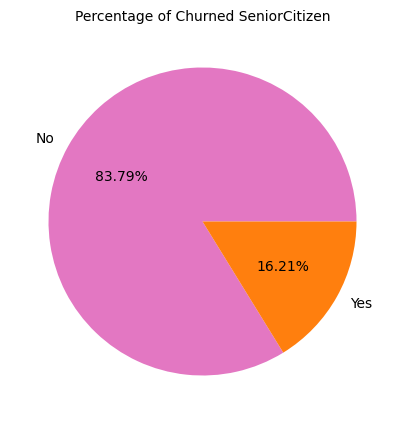

In [25]:
plt.figure(figsize=(5,5))
gb=df.groupby("SeniorCitizen").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,colors=["#e377c2","#ff7f0e"],autopct="%1.2f%%")
plt.title("Percentage of Churned SeniorCitizen",fontsize=10)
plt.show()

C:\Users\Rahul Sah\AppData\Local\Temp\ipykernel_10068\3197197329.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count_data.iloc[i].cumsum()[j] - count_data.iloc[i][j] / 2,
C:\Users\Rahul Sah\AppData\Local\Temp\ipykernel_10068\3197197329.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{count_data.iloc[i][j]:.1f}%", ha='center', va='center', color='white')


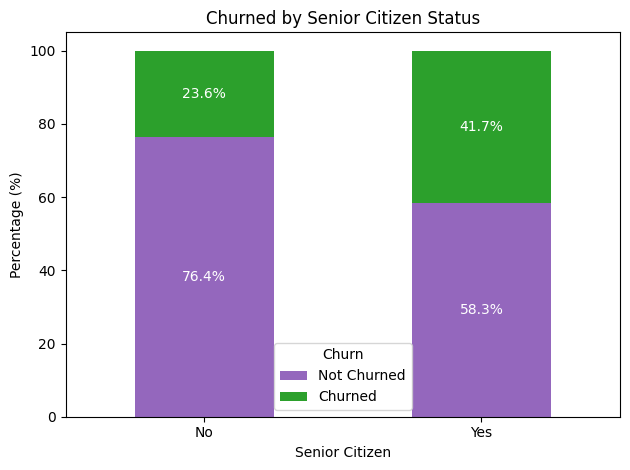

In [26]:
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)
count_data = count_data.div(count_data.sum(axis=1), axis=0) * 100  # Calculate percentage

# Plotting
colors = ['#9467bd', '#2ca02c']  # Define your colors for each Churn category
count_data.plot(kind='bar', stacked=True, color=colors)

# Adding labels
plt.title("Churned by Senior Citizen Status")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Annotating the percentages on the bars
for i in range(len(count_data)):
    for j in range(len(count_data.columns)):
        plt.text(i, count_data.iloc[i].cumsum()[j] - count_data.iloc[i][j] / 2,
                 f"{count_data.iloc[i][j]:.1f}%", ha='center', va='center', color='white')

plt.tight_layout()
plt.show()


#Compararively a greater perccentage of people in senior citizen category have been Churned Out.

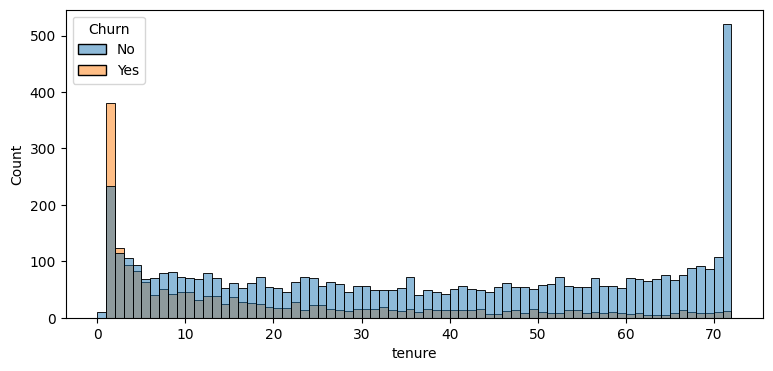

In [27]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data = df,bins=72,hue='Churn')
plt.show()

#People who have used our services for a long time have stayed and those who had used our services for 1 0r 2 month seems to be Churned Out.

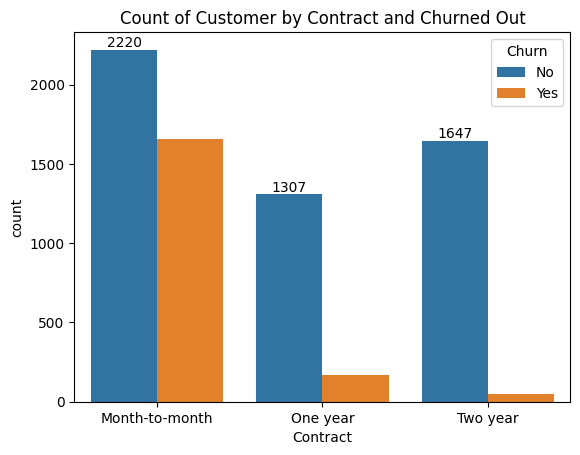

<Figure size 600x400 with 0 Axes>

In [28]:
bx=sns.countplot(x="Contract",data=df,hue="Churn")
bx.bar_label(bx.containers[0],fontsize=10)
plt.title("Count of Customer by Contract and Churned Out")
plt.figure(figsize=(6,4))
plt.show()

#People who spent month to month contract are likely to churn out than from those who have 1 or 2 year of contract.

In [29]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

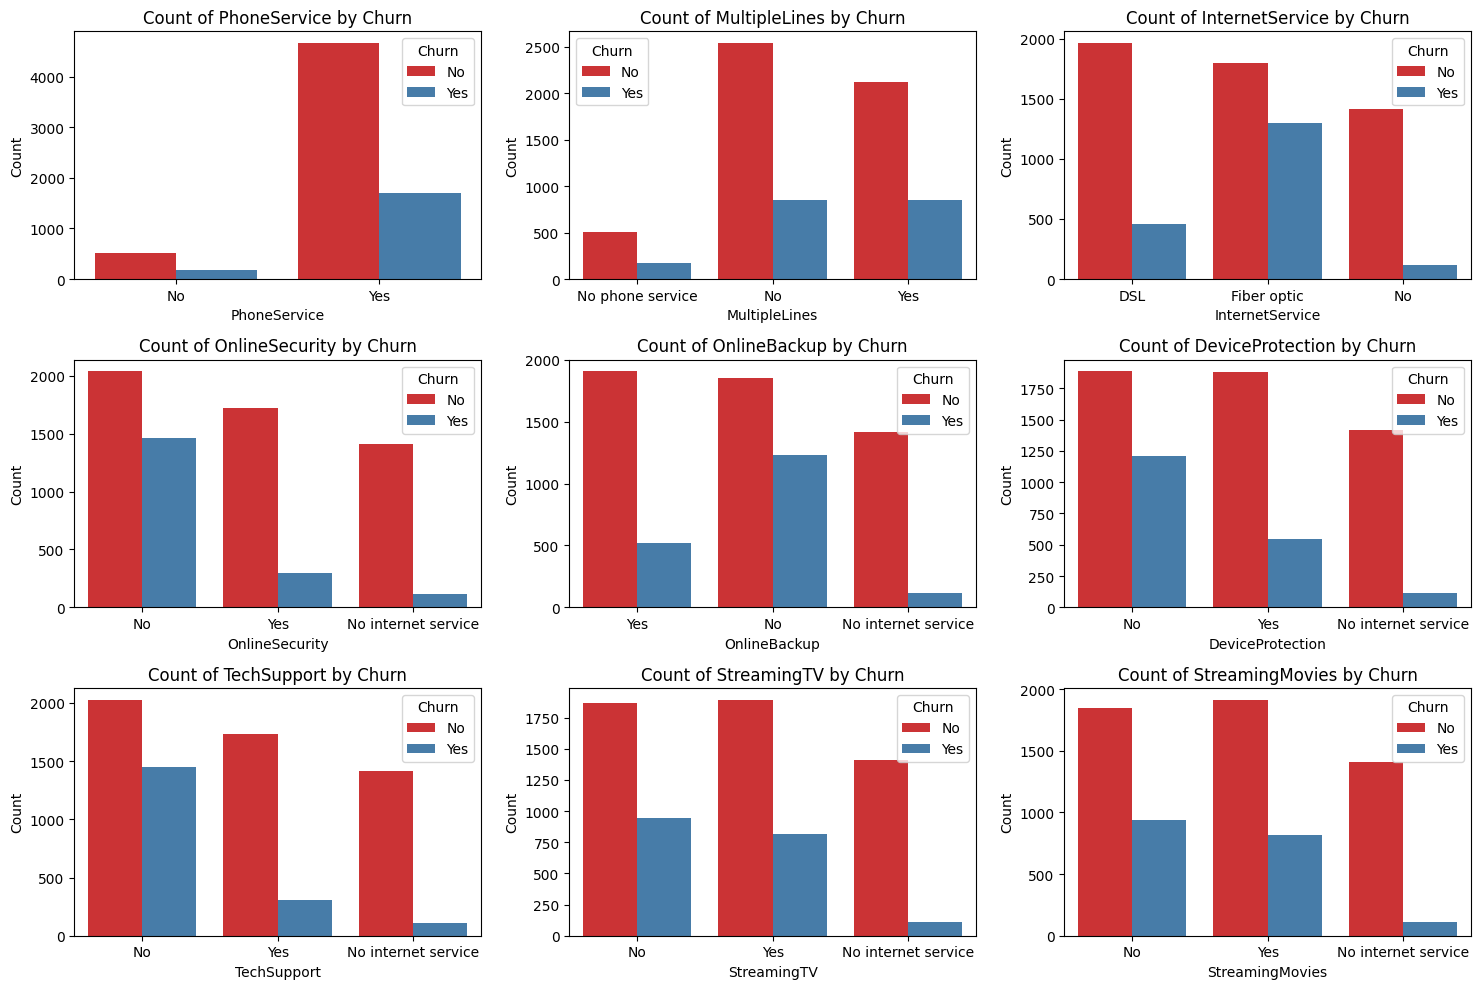

In [33]:

# List of columns to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set the number of subplots
num_columns = len(columns)
fig, axes = plt.subplots(nrows=(num_columns + 2) // 3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create count plots
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, hue='Churn', ax=axes[i], palette='Set1')
    axes[i].set_title(f'Count of {column} by Churn')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# Key observations include higher churn rates among users with fiber optic internet, a higher likelihood of churn among those who do not have online security or tech support, and lower churn for users with access to streaming services.

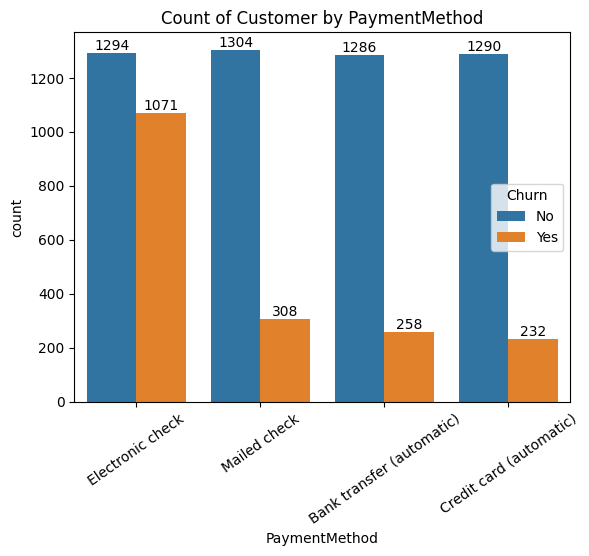

<Figure size 600x400 with 0 Axes>

In [42]:
bx=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
bx.bar_label(bx.containers[0],fontsize=10)
bx.bar_label(bx.containers[1])
plt.title("Count of Customer by PaymentMethod")
plt.xticks(rotation=35)
plt.figure(figsize=(6,4))
plt.show()

#Customer is likely to churn when he is using electronic check as a payment method.